# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [5]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2018-08-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
# YOUR CODE HERE!
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-08-06 04:00:00+00:00,345.00,354.98,341.8200,341.99,8564349,94745,348.791044
2018-08-07 04:00:00+00:00,343.84,387.46,339.1501,379.57,30876809,332458,364.240162
2018-08-08 04:00:00+00:00,368.84,382.64,367.1200,370.34,24608013,278774,374.104677
2018-08-09 04:00:00+00:00,365.55,367.01,345.7300,352.45,17183938,195136,355.494616
2018-08-10 04:00:00+00:00,353.78,360.00,346.0000,355.49,11556348,119931,353.663867


In [7]:
# Reorganize the DataFrame
df_ticker = pd.concat([df_ticker], axis=1, keys=["TSLA"])

# Display sample data
df_ticker.head()

TSLA                                      \
                             open    high       low   close    volume   
timestamp                                                               
2018-08-06 04:00:00+00:00  345.00  354.98  341.8200  341.99   8564349   
2018-08-07 04:00:00+00:00  343.84  387.46  339.1501  379.57  30876809   
2018-08-08 04:00:00+00:00  368.84  382.64  367.1200  370.34  24608013   
2018-08-09 04:00:00+00:00  365.55  367.01  345.7300  352.45  17183938   
2018-08-10 04:00:00+00:00  353.78  360.00  346.0000  355.49  11556348   

                                                   
                          trade_count        vwap  
timestamp                                          
2018-08-06 04:00:00+00:00       94745  348.791044  
2018-08-07 04:00:00+00:00      332458  364.240162  
2018-08-08 04:00:00+00:00      278774  374.104677  
2018-08-09 04:00:00+00:00      195136  355.494616  
2018-08-10 04:00:00+00:00      119931  353.663867

### Run the Monte Carlo Simulation

In [8]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
# YOUR CODE HERE!
MC_TSLA = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = num_sims,
    num_trading_days = 252
)

In [9]:
# Run Monte Carlo simulations to forecast three years daily returns
# YOUR CODE HERE!
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\P630461\Documents\FinTech-Bootcamp\FinTechBC-ClassActivity\5.3\06-Stu_Financial_Forecasting\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.875069,0.978606,0.946289,1.067106,0.953689,0.973537,1.017278,0.985097,0.985669,1.008429,...,1.045846,0.967817,0.896030,0.956870,1.118369,1.006934,0.971104,1.005023,1.020835,0.949863
2,0.884121,0.978931,0.912870,1.042104,0.976975,0.979821,1.056227,0.979618,0.930730,1.172638,...,1.004520,1.018722,0.870535,1.009150,1.231391,0.970211,0.956606,1.012207,0.964571,1.028378
3,0.879550,0.971268,0.918469,0.988787,1.008315,0.954175,1.148440,0.922428,0.807313,1.095813,...,0.964575,0.995875,0.866136,0.914525,1.236409,0.982656,0.974494,1.025733,0.999137,0.988471
4,0.845119,0.988610,0.823829,0.973825,0.903199,0.897624,1.207059,0.912552,0.830191,1.098306,...,1.028718,1.051691,0.801071,0.872361,1.338677,1.005001,1.025376,0.999704,0.967634,0.980188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.023229,0.921105,0.936606,2.832595,0.691991,1.865771,0.822136,0.833080,2.582132,2.722616,...,2.084887,2.878974,1.022494,1.468480,0.817689,6.889040,1.717001,0.971113,0.919565,0.770796
249,1.970726,0.954438,0.962404,3.063282,0.567587,1.923653,0.835001,0.787321,2.577520,2.736363,...,2.101355,3.162541,0.997806,1.417991,0.781888,6.540487,1.748737,0.920441,0.944906,0.740859
250,1.825441,0.917761,0.926074,3.139326,0.629490,1.945557,0.785172,0.729848,2.477197,2.708866,...,2.161774,3.193106,1.068843,1.512848,0.729352,6.201559,1.781706,0.926456,0.896156,0.675906
251,1.814243,0.957574,0.884405,3.136319,0.616444,1.984385,0.727728,0.709281,2.567482,2.793475,...,2.236976,3.283401,0.951927,1.368943,0.765539,5.704890,1.875197,0.932656,0.789115,0.711884


### With these results, create a DataFrame which holds the mean, median, minimum, and maximum simulated performance.

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.006692,1.006824,0.858453,1.162218
2,1.011145,1.009243,0.806299,1.261842
3,1.012708,1.008937,0.778501,1.322409
4,1.018413,1.011402,0.741326,1.432840


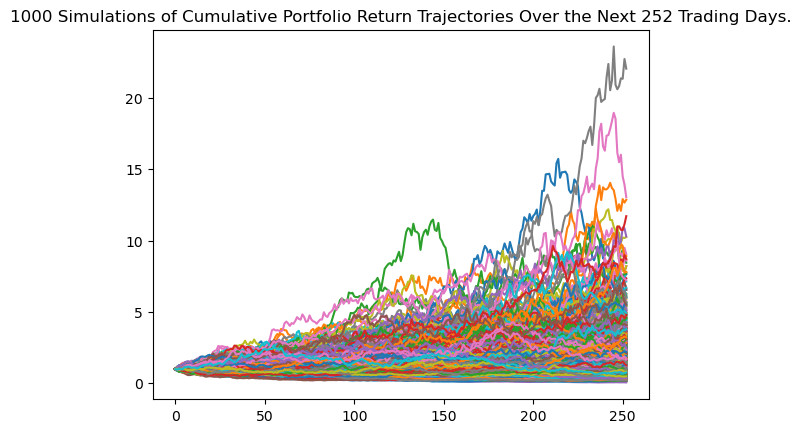

In [10]:
# Compute summary statistics from the simulated daily returns
# YOUR CODE HERE!
simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}


line_plot = MC_TSLA.plot_simulation()

# Create a DataFrame with the summary statistics
# YOUR CODE HERE!
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
# YOUR CODE HERE!
df_simulated_returns.head()

### Plot the Simulated Cumulative Return Trajectory for `TSLA` over the Next Three Years (252*3 Trading Days)

#### Use just the `mean` and `median` forecasts.

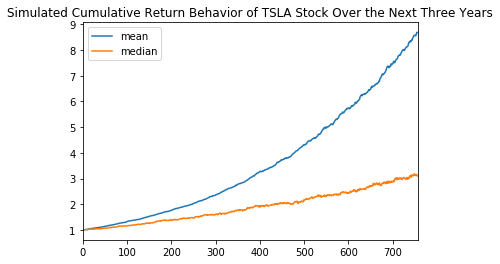

In [8]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
# YOUR CODE HERE!

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [9]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
# YOUR CODE HERE!

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10013.115305,10004.092560,8344.473736,11646.088289
2,10029.054667,9991.049751,7955.610383,12275.985409
3,10053.651540,10013.629782,7273.169614,13039.980105
4,10082.096062,10034.824507,7416.662272,13529.217211


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

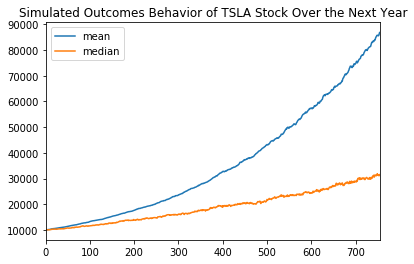

In [10]:
# Use the 'plot' function to create a chart of the simulated profits/losses
# YOUR CODE HERE!

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               8.687747
std               18.447810
min                0.031020
25%                1.214494
50%                3.100443
75%                8.353490
max              291.983352
95% CI Lower       0.172285
95% CI Upper      55.412753
Name: 756, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $1722.85 and $554127.53.
